# Turbulent flows. Statistical description and characteristic scales

This topic has been prepared principally based on chapter 3 of excellent Pope's book ["Turbulent Flows"](https://www.cambridge.org/es/academic/subjects/physics/nonlinear-science-and-fluid-dynamics/turbulent-flows?format=PB)
( [UPC library link](https://discovery.upc.edu/permalink/34CSUC_UPC/rdgucl/alma991002746599706711) )

## 1. Random variables

According to Wikipedia, a random variable is the outcome of a [random phenomenon](https://en.wikipedia.org/wiki/Randomness) which, apparently, lacks a pattern or predictability.

The numpy module has a random number generator.

In [1]:
from numpy.random import default_rng
import numpy as np
rng = default_rng()
rng.uniform()

0.7972342348710986

Every time we call this function, it will generate a different value, in this case, with a uniform distribution between 0 and 1

In [2]:
rng.uniform()

0.2794402290172807

We cannot predict the value, but the probability of the numbers is the same.

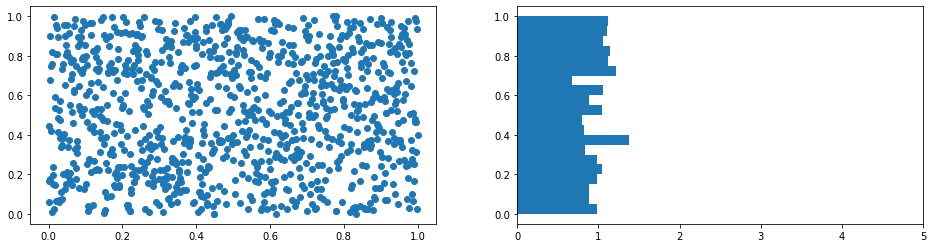

In [3]:
import matplotlib.pyplot as plt
rvar = rng.uniform(size=1000)
x_plot = np.linspace(0,1,1000)
fig,ax = plt.subplots(1,2,figsize=(16,4))
ax[0].scatter(x_plot,rvar)
ax[1].hist(rvar,bins=20,orientation="horizontal",density=True);
ax[1].set_xlim([0,5]);

We can generate random numbers with another probability distribution, for example, a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)

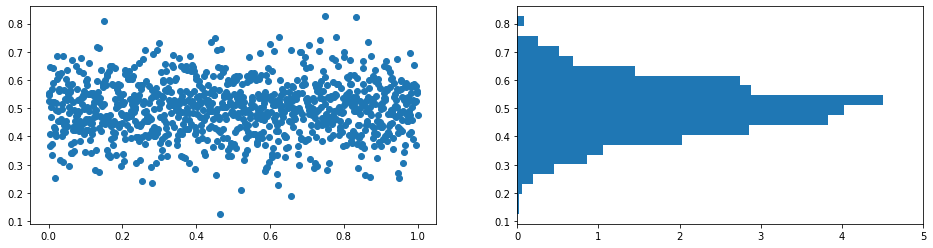

In [4]:
rnvar = rng.normal(loc=0.5,scale=0.1,size=1000)
fig,ax = plt.subplots(1,2,figsize=(16,4))
ax[0].scatter(x_plot,rnvar)
ax[1].hist(rnvar,bins=20,orientation="horizontal",density=True);
ax[1].set_xlim([0,5]);

## 2. Lorenz equation and chaos

One of the characteristics of [turbulent](https://en.wikipedia.org/wiki/Turbulence) flow is that it is _chaotic_, meaning that, after a while, it becomes random. But, how can be random a phenomenon that, like laminar flow, is described by deterministic Navier-Stokes equations? The answer lies in the initial and boundary conditions. Unlike laminar flows (like the ones we saw in microflows part), turbulent flows are very sensitive to very small changes in initial and boundary conditions: small vibrations, slight changes in temperature, pressure, surface...

Let's see that with a typical example: [Lorenz equations](https://en.wikipedia.org/wiki/Lorenz_system). Lorenz defined a system of 3 non linear ODEs:

$$
\frac {\mathrm{d} x}{\mathrm{d} t} = \sigma (y-x),
$$
$$
\frac {\mathrm{d} y}{\mathrm{d} t} = x(\rho -z)-y,
$$
$$
\frac {\mathrm{d} z}{\mathrm{d} t} = xy-\beta z.
$$

where $\rho$, $\beta$ and $\sigma$ are constant parameters. It the values $\rho = 28.0$, $\sigma = 10.0$ and $\beta = 8/3$, it gives the famous Lorenz attractor.

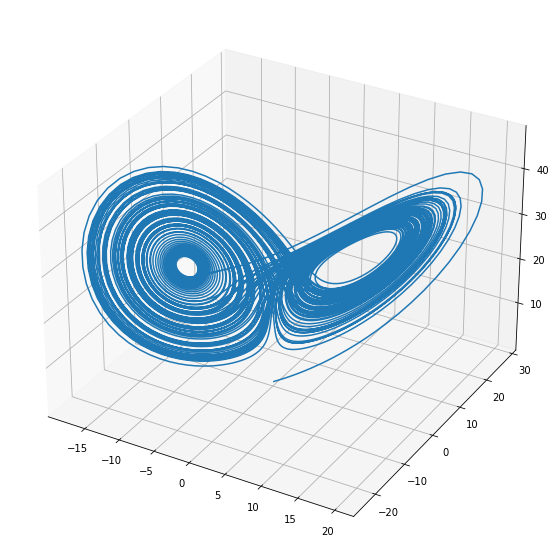

In [11]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(pos, t):
    x, y, z = pos  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

pos0 = [0.1, 0.1, 0.1]
t = np.arange(0.0, 100.0, 0.01)

pos = odeint(f, pos0, t)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.plot(pos[:, 0], pos[:, 1], pos[:, 2]);

Let's plot only the $x$ coordinate in time

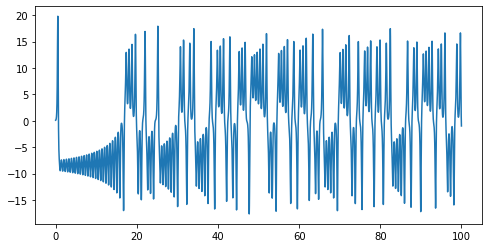

In [6]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
ax.plot(t,pos[:,0])

... and let's change only slightly the initial position

In [7]:
pos0 = [0.1000001, 0.1, 0.1]
pos_new = odeint(f, pos0, t)

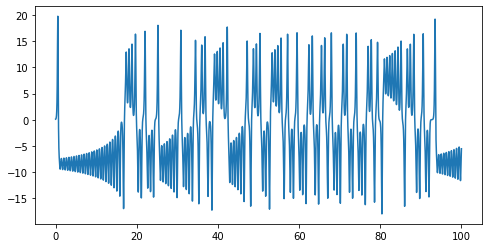

In [8]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
ax.plot(t,pos_new[:,0])

You can see that, after a while, $x$ position changes in an unpredictable way. 

We can compute this change of position in time

In [9]:
delta_x = pos_new[:,0] - pos[:,0]

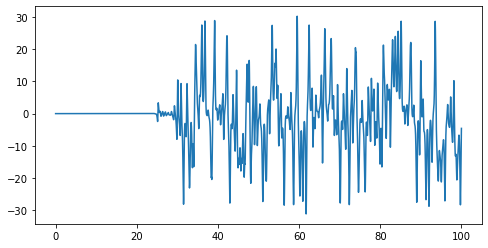

In [10]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
ax.plot(t,delta_x)

You can try playing with it, making the difference in the initial position more and more small (for instance, `pos0 = [0.100000000001, 0.1, 0.1]`). When will be the two results indentical? Why?